In [8]:
import geopandas as gpd
import pandas as pd
import openpyxl
import xarray as xr
import matplotlib.pyplot as plt
from scipy.io import netcdf
import numpy as np
import matplotlib


# Definir los límites del mapa
min_lon, max_lon = -85, -77
min_lat, max_lat = 1, 10

# Leer las capas desde un GeoPackage
# Supongamos que el archivo geopackage tiene varias capas
geopackage_path = "../data/gis/GeoLayers.gpkg"
gdf = gpd.read_file(geopackage_path, layer="Continente")  # Cambia el nombre de la capa

dataIctio = pd.read_excel("../data/raw/biodiversity/Listado_Especies_v3 revisada_BB.xlsx", sheet_name="organismQuantity")


In [9]:
dataIctio

,YEAR,crucero,epoca,ONI,Categoria_ONI,ESTACION,ESPACIO,LATITUD,LONGITUD,fieldNumber,...,Trichiurus nitens,Triphoturus cf. mexicanus,Triphoturus nigrescens,Triphoturus oculeos,Vinciguerria lucetia,Vinciguerria poweriae,Woodsia nonsuchae,Xyrichtys sp1,Xyrichtys sp2,Zalieutes elater
0,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,24,Pelágica,3.000000,-78.500000,ERFEN9304_24,...,0,0,0,0,170.0,0,0,0,0,0
1,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,40,Pelágica,2.500000,-79.500000,ERFEN9304_40,...,0,0,0,0,120.0,0,0,0,0,0
2,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,33,Pelágica,2.000000,-79.000000,ERFEN9304_33,...,35,0,0,0,500.0,0,0,0,0,0
3,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,33A,Pelágica,1.966944,-78.918333,ERFEN9304_ 33A,...,0,0,0,0,133.0,0,0,126,0,0
4,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,MND,Malpelo,4.017017,-81.617050,ERFEN9304_ MND,...,0,0,0,0,168.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,97,Pelágica,2.000000,-83.000000,ERFEN1909_97,...,0,0,0,0,0.0,0,0,0,0,0
206,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,107,Pelágica,5.000000,-84.000000,ERFEN1909_107,...,0,0,0,0,3.0,0,0,0,0,0
207,2019-09-25,2019-09,Chorro Chocó,Neutro,Neutro,109,Pelágica,4.000000,-84.000000,ERFEN1909_109,...,0,0,0,0,0.0,0,0,0,0,0
208,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,111,Pelágica,3.000000,-84.000000,ERFEN1909_111,...,0,0,0,0,2.0,0,0,0,0,0


In [13]:
dataBio = gpd.GeoDataFrame(
    dataIctio, geometry=gpd.points_from_xy(dataIctio.LONGITUD, dataIctio.LATITUD), crs="EPSG:4326"
)

In [14]:
dataBio

,YEAR,crucero,epoca,ONI,Categoria_ONI,ESTACION,ESPACIO,LATITUD,LONGITUD,fieldNumber,...,Triphoturus cf. mexicanus,Triphoturus nigrescens,Triphoturus oculeos,Vinciguerria lucetia,Vinciguerria poweriae,Woodsia nonsuchae,Xyrichtys sp1,Xyrichtys sp2,Zalieutes elater,geometry
0,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,24,Pelágica,3.000000,-78.500000,ERFEN9304_24,...,0,0,0,170.0,0,0,0,0,0,POINT (-78.5 3)
1,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,40,Pelágica,2.500000,-79.500000,ERFEN9304_40,...,0,0,0,120.0,0,0,0,0,0,POINT (-79.5 2.5)
2,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,33,Pelágica,2.000000,-79.000000,ERFEN9304_33,...,0,0,0,500.0,0,0,0,0,0,POINT (-79 2)
3,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,33A,Pelágica,1.966944,-78.918333,ERFEN9304_ 33A,...,0,0,0,133.0,0,0,126,0,0,POINT (-78.91833 1.96694)
4,1993-04-01,1993-04,Chorro Panamá,Neutro,Neutro,MND,Malpelo,4.017017,-81.617050,ERFEN9304_ MND,...,0,0,0,168.0,0,0,0,0,0,POINT (-81.61705 4.01702)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,97,Pelágica,2.000000,-83.000000,ERFEN1909_97,...,0,0,0,0.0,0,0,0,0,0,POINT (-83 2)
206,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,107,Pelágica,5.000000,-84.000000,ERFEN1909_107,...,0,0,0,3.0,0,0,0,0,0,POINT (-84 5)
207,2019-09-25,2019-09,Chorro Chocó,Neutro,Neutro,109,Pelágica,4.000000,-84.000000,ERFEN1909_109,...,0,0,0,0.0,0,0,0,0,0,POINT (-84 4)
208,2019-09-01,2019-09,Chorro Chocó,Neutro,Neutro,111,Pelágica,3.000000,-84.000000,ERFEN1909_111,...,0,0,0,2.0,0,0,0,0,0,POINT (-84 3)


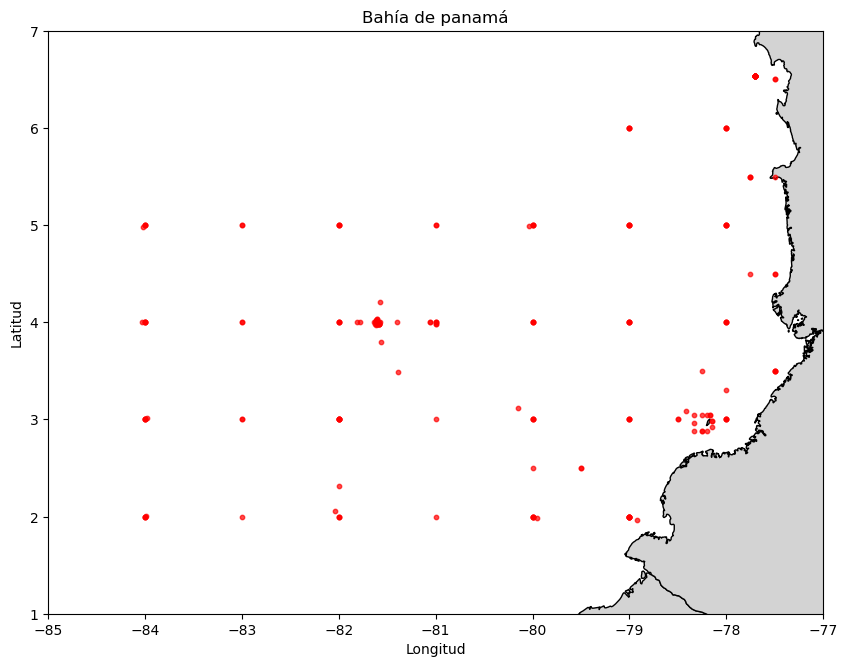

In [19]:

# Filtrar las geometrías dentro del área de interés
gdf_filtered = gdf.cx[min_lon:max_lon, min_lat:max_lat]


# Crear la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar las capas del GeoPackage

gdf_filtered.plot(ax=ax, color='lightgray', edgecolor='black')
dataBio.plot(ax=ax, color='red', markersize=10, alpha=0.7, label='Especies Ictioplancton')

# Configurar límites del mapa
ax.set_ylim(1, 7)
ax.set_xlim(-85, -77)

# Añadir título y etiquetas
plt.title("Bahía de panamá")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar el mapa
plt.show()
